In [2]:
import csv
import thesis_tools
import numpy as np
import pandas as pd
from scipy.stats import linregress

import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline
plt.style.use('sm')

import seaborn as sb
blue=sb.xkcd_palette(['windows blue'])[0]
amber=sb.xkcd_palette(['amber'])[0]
red=sb.xkcd_palette(['pale red'])[0]


In [4]:
sheffer_data=pd.read_csv('sheffer_co_h2.csv')
burgh_data=pd.read_csv('burgh_data.csv')
published_hs=pd.read_csv('clean_vizier_results.csv')

In [5]:
with open('primary_sightlines.csv','r') as csvfile:
    inp=csv.reader(csvfile)
    primary_sightlines=next(inp)

sl_data=thesis_tools.load_data(primary_sightlines)
all_data=thesis_tools.load_results(sl_data)

/Users/codydirks/python/thesis_tools/loaders.py:110: RuntimeWarning: divide by zero encountered in log10
  n_dict[ion]=round(np.log10(n_tot),3)
/Users/codydirks/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/codydirks/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/codydirks/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/codydirks/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/codydirks/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarni

In [7]:
# This cell extracts the curves from the plots of Gong et al. (2017)
# for abundances of species as a function of N(Htot)

from skimage import io, img_as_float, color,exposure
from scipy import stats
files=[50,100,200,1000]

# Colours of interest
# Each tuple is a color to be isolated in the Gong plots,
# with the form (color_id, CIE color, RGB color identifier)
cols = [('C',np.array([54.29,80.81,69.89]),'r'),
        ('CO',np.array([45.90,71.61,-46.57]),'m'),
        ('C+',np.array([74.95,-11.19,68.45]),'y')
       ]

co_c_cii_theor_results=[]
for fl in files:
    img=io.imread('{:}.png'.format(fl))

    img = img_as_float(img[:,:,0:3])

    # Put image into LAB colour space
    image_lab = color.rgb2lab(img)
    img = exposure.rescale_intensity(img)    
    # Loop through the color array and pick out the colored features
    # Compute distance between the color of interest and the actual image
    # http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.deltaE_cmc
    # "The usual values are kL=2, kC=1 for “acceptability”"
    num_y_pix,num_x_pix=img.shape[0:2]


    fit_results=[]
    for species,cie_col,rgb_col in cols:
        distance_color = color.deltaE_ciede2000(cie_col, image_lab, kL=2, kC=1, kH=0.5)    

        # Normalise distance
        distance_color = exposure.rescale_intensity(distance_color)

        # Mask image
        image_filtered = img.copy()
        image_filtered[distance_color > 0.1] = 1
        y,x=np.where(image_filtered[:,:,0] != 1)
        y=(-9./num_y_pix)*y+19.
        x=(2./num_x_pix)*x+20.

        #f, (ax0,ax1)=plt.subplots(1,2)
        #f.set_figwidth(12)
        # Plot it up
        #ax0.imshow(img,aspect='auto',extent=[20,22,10,19])
        #ax1.imshow(distance_color, cmap='gray')
        #ax1.imshow(image_filtered,aspect='auto',extent=[20,22,10,19])
        #ax1.scatter(x,y,marker='o',color=rgb_col,s=.1)
        #ax1.set_ylim(10,19)
        
        points=list(zip(x,y))
        fitx=np.empty(0)
        fity=np.empty(0)
        for val in np.arange(20.2,22,0.1):
            ys=[round(i[1],1) for i in points if round(i[0],1)==round(val,1)]
            mod=stats.mode(ys)[0][0]
            fitx=np.concatenate([fitx,[round(val,1)]])
            fity=np.concatenate([fity,[mod]])
            #ax1.plot(val,mod,'ko',markersize=10)
        cheb=np.polynomial.chebyshev.chebfit(fitx,fity,7)
        cheby=np.polynomial.chebyshev.chebval(fitx,cheb)
        fit_results.append((species,(fitx,cheby)))
        #ax1.plot(fitx,cheby,'k-',linewidth=1)
    co_c_cii_theor_results.append((fl,fit_results))

# Colours of interest
# Each tuple is a color to be isolated in the Gong plots,
# with the form (color_id, CIE color, RGB color identifier)
cols = [('H2',np.array([0,0,0]),'k'),]
h2_theor_results=[]
for fl in [str(i)+'_h2' for i in files]:
    img=io.imread('{:}.png'.format(fl))

    img = img_as_float(img[:,:,0:3])

    # Put image into LAB colour space
    image_lab = color.rgb2lab(img)
    img = exposure.rescale_intensity(img)    
    # Loop through the color array and pick out the colored features
    # Compute distance between the color of interest and the actual image
    # http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.deltaE_cmc
    # "The usual values are kL=2, kC=1 for “acceptability”"
    num_y_pix,num_x_pix=img.shape[0:2]


    fit_results=[]
    for species,cie_col,rgb_col in cols:
        distance_color = color.deltaE_ciede2000(cie_col, image_lab, kL=2, kC=1, kH=0.5)    

        # Normalise distance
        distance_color = exposure.rescale_intensity(distance_color)

        # Mask image
        image_filtered = img.copy()
        image_filtered[distance_color > 0.1] = 1
        y,x=np.where(image_filtered[:,:,0] != 1)
        y=(-4./num_y_pix)*y+19.+2.6989
        x=(2./num_x_pix)*x+20.

        #f=plt.figure(figsize=(16,12),facecolor='w')
        #ax0=plt.subplot(121)
        #ax1=plt.subplot(122)
        # Plot it up
        #ax0.imshow(img,aspect='auto',extent=[20,22,15,19])
        #ax1.imshow(distance_color, cmap='gray')
        #ax1.imshow(image_filtered,aspect='auto',extent=[20,22,15,19])
        #ax1.scatter(x,y,marker='o',color=rgb_col,s=.1)
        #ax1.set_ylim(15,19)
        #ax1.set_xlim(20,22)
        points=list(zip(x,y))
        fitx=np.empty(0)
        fity=np.empty(0)
        for val in np.arange(20.2,22,0.1):
            ys=[round(i[1],1) for i in points if round(i[0],1)==round(val,1)]
            mod=stats.mode(ys)[0][0]
            fitx=np.concatenate([fitx,[round(val,1)]])
            fity=np.concatenate([fity,[mod]])
            #ax1.plot(val,mod,'ko',markersize=10)
        cheb=np.polynomial.chebyshev.chebfit(x,y,7)
        cheby=np.polynomial.chebyshev.chebval(fitx,cheb)
        fit_results.append((species,(fitx,cheby)))
        #ax1.plot(fitx,cheby,'k-',linewidth=1)
    h2_theor_results.append((int(fl.split('_')[0]),fit_results))
theor_results=[]
for entry in list(zip(co_c_cii_theor_results,h2_theor_results)):
    n=entry[0][0]
    c,co,cii=entry[0][1]
    h2=entry[1][1][0]
    theor_results.append((n,(c,co,cii,h2)))

/Users/codydirks/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:123: RankWarning: The fit may be poorly conditioned


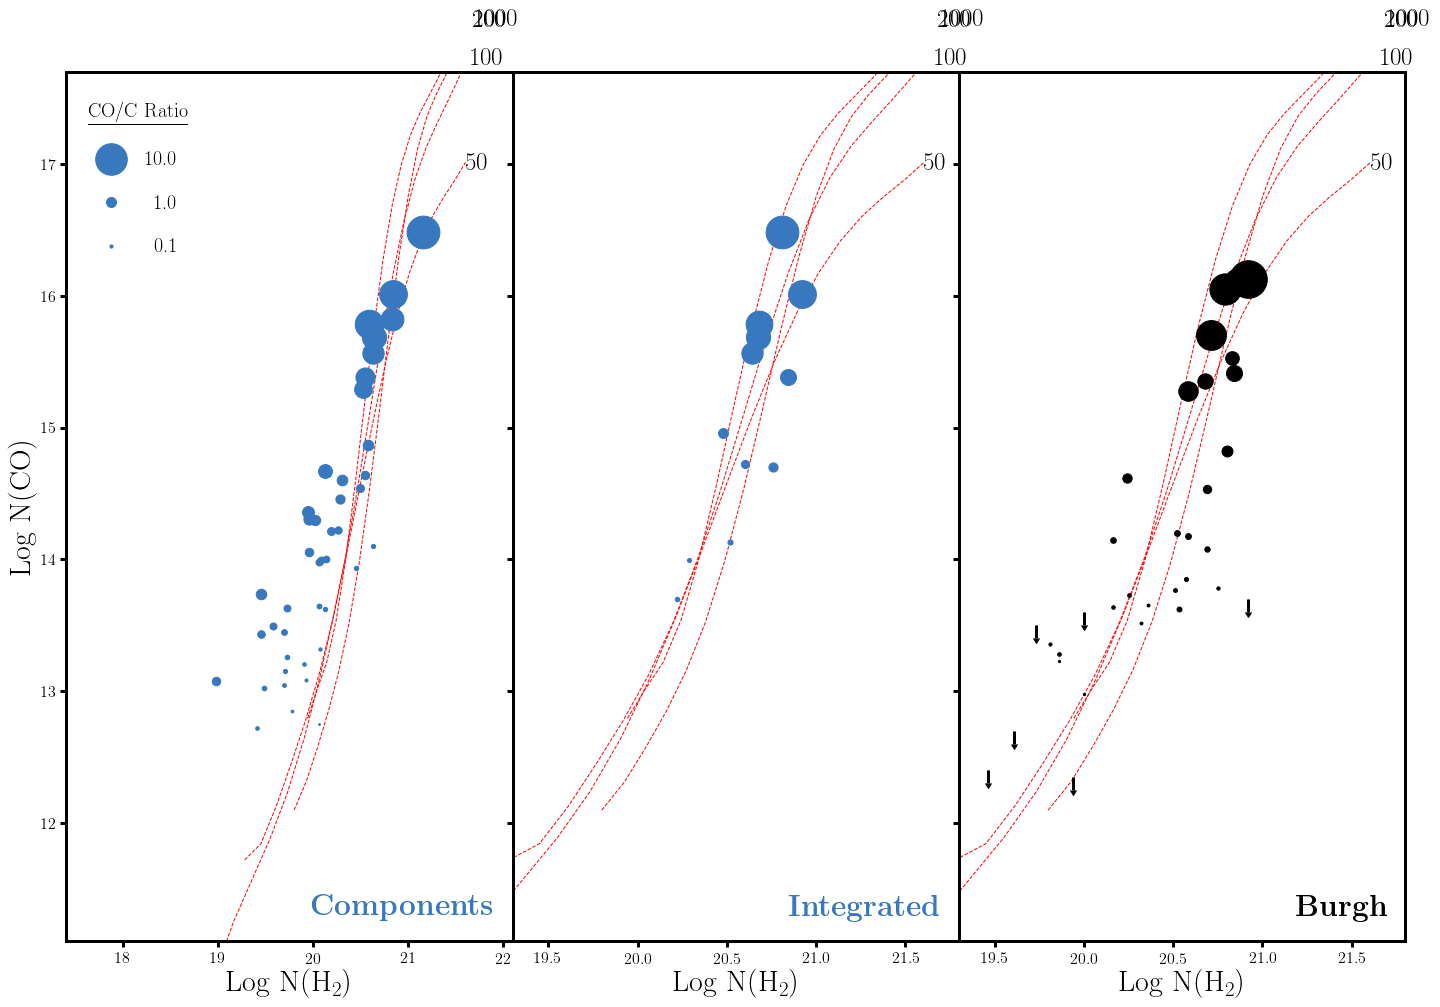

In [5]:
fig=plt.figure(figsize=(24,16),facecolor='w')
subplt1=plt.subplot(131)
subplt2=plt.subplot(132)
subplt3=plt.subplot(133)
plt.subplots_adjust(wspace=0)

# Plot H2 and CO for all components with detected Cl I (which traces H2)
for sl,mydata in all_data.groupby('Sightline'):
    #cl_sum=np.log10((10**mydata['Cl']).sum())
    #published_h2s=published_hs[published_hs['Name']==sl]['N(H2)'].dropna()
    #if len(published_h2s)>0:
    #    h2_sum=np.log10(published_h2s.iloc[-1])
    #    for idx,row in mydata[mydata['C']>0].iterrows():
    #        c_sum=np.log10(np.sum([10**n for n in row[['C','C*','C**']]]))
    #        x_cl=round(10**(row['Cl']-cl_sum),4)
    #        h2=np.log10(x_cl*10**(h2_sum))
    #else:
    #    h2=row['H_2']
    #        c_sum=np.log10(np.sum([10**n for n in row[['C','C*','C**']]]))
    #        if row['CO']==0:
    #            subplt1.errorbar(h2,row['CO_err'],yerr=0.1,uplims=True,marker='o',color=blue,markersize=1)
    #        else:
    #            co_c_ratio=10**(row['CO']-c_sum)
    #            subplt1.plot(h2,row['CO'],marker='o',color=blue,markersize=np.sqrt(100*co_c_ratio))
    #            subplt1.text(h2,row['CO'],sl)
    for idx,row in mydata[mydata['CO']>0].iterrows():
        co=row['CO']
        c=np.log10((10**row[['C','C*','C**']]).sum())
        co_c_ratio=10**(co-c)
        co_h2_ratio=((co-c)-5.4674)/0.949756
        h2=co-co_h2_ratio
        subplt1.plot(h2,co,marker='o',color=blue,markersize=np.sqrt(100*co_c_ratio))
    
        
# Plot H2 and CO integrated along sightlines
for sl, data in all_data.groupby('Sightline'):
    c_sum=np.log10((10**data[['C','C*','C**']]).sum().sum())
    co_sum=np.log10(np.sum([10**n for n in data['CO']]))
    co_c_ratio=10**(co_sum-c_sum)
    
    # Use integrated values from literature, rather than my
    # derived values from Cl I
    published_h2s=published_hs[published_hs['Name']==sl]['N(H2)']
    if len(published_h2s)>0:
        h2_sum=np.log10(published_h2s.iloc[0])
        subplt2.plot(h2_sum,co_sum,marker='o',color=blue,markersize=np.sqrt(100*co_c_ratio))
    

for idx,row in burgh_data.iterrows():
    h2=float(row['H2'])
    c=float(row['CI'])
    if row['CO'].startswith('<'):
        co=float(row['CO'][1:])
        yerr=0.1
        ms=0.1
        ul=True
        subplt3.errorbar(h2,co,yerr=yerr,uplims=ul,marker='o',color='k',markersize=ms)
    else:
        co=float(row['CO'])
        yerr=0
        xerr=0
        co_c_ratio=10**(co-c)
        ms=np.sqrt(100*(co_c_ratio))
        ul=False
        subplt3.plot(h2,co,'ko',markersize=ms)

tx=np.arange(17.5,21.5,0.1)

# Formatting stuff
for subplt in (subplt1,subplt2,subplt3):
    # Include lines of constant CO/H2 ratio
    for rat in [-4,-5,-6,-7]:
        ty=tx+rat
        #subplt.plot(tx,ty,'k--',linewidth=1)
        #subplt.text(tx[-1],ty[-1],'10$^{'+str(rat)+'}$',fontsize=20,va='center')

    # Plot formatting
    subplt.set_ylim(11.1,17.7)
    subplt.set_xlabel('Log N(H$_2$)',fontsize=30)

subplt1.set_xlim(17.4,22.1)
subplt2.set_xlim(19.3,21.8)
subplt3.set_xlim(19.3,21.8)

subplt1.text(0.16,0.94,'\\underline{CO/C Ratio}',fontsize=20,ha='center',transform=subplt1.transAxes)
for i in (0,1,2):
    subplt1.plot(0.1,0.8+i*0.05,marker='o',color=blue,markersize=np.sqrt(100*10**(i-1)),transform=subplt1.transAxes)
    subplt1.text(0.25,0.8+i*0.05,'{:>4.1f}'.format(10**(i-1)),fontsize=20,ha='right',va='center',transform=subplt1.transAxes)
subplt1.set_ylabel('Log N(CO)',fontsize=30)
subplt2.set_yticklabels([])
subplt3.set_yticklabels([])
subplt1.text(0.96,0.03,'\\textbf{Components}',color=blue,fontsize=30,transform=subplt1.transAxes,ha='right')
subplt2.text(0.96,0.03,'\\textbf{Integrated}',color=blue,fontsize=30,transform=subplt2.transAxes,ha='right')
subplt3.text(0.96,0.03,'\\textbf{Burgh}',color='k',fontsize=30,transform=subplt3.transAxes,ha='right')



#s1 = C
#s2 = CO
#s3 = H2
for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y)),(s3,(s3x,s3y)),(s4,(s4x,s4y))] in theor_results:
    for subplt in (subplt1,subplt2,subplt3):
        h2=s4y
        c=s1y-1.8
        co=s2y
        subplt.plot(h2,co,'r--',zorder=-1,linewidth=1)
        subplt.text(h2[-1],co[-1],str(n),fontsize=25,ha='left',va='center')

Text(0.5,0,'CO/H2 Ratio')

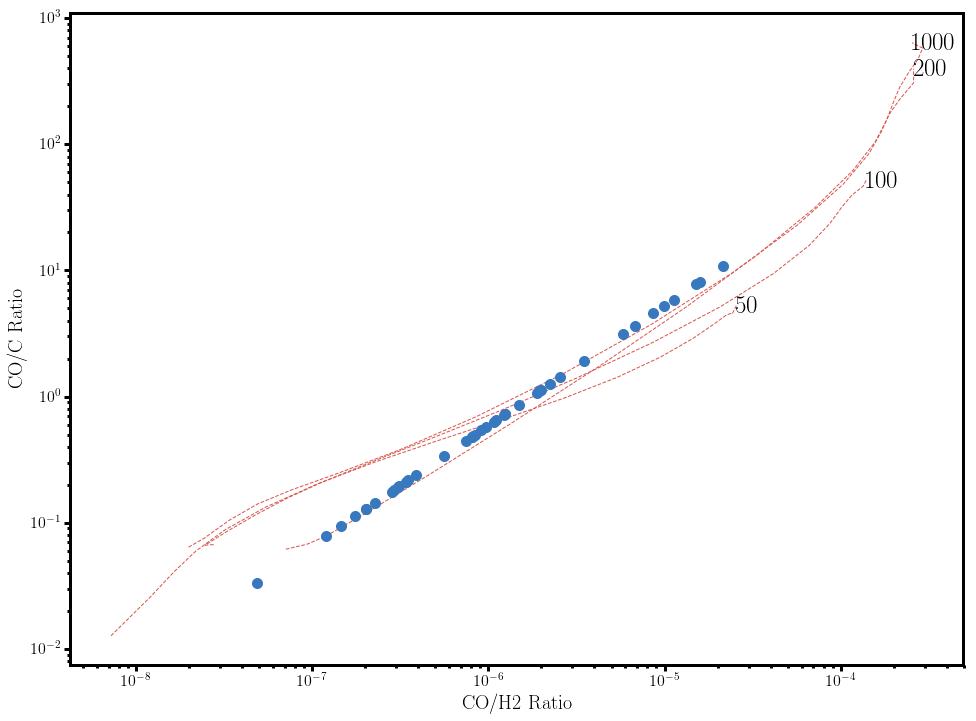

In [6]:
fig=plt.figure(figsize=(16,12),facecolor='w')
subplt=plt.subplot(111)

# Plot H2 and CO for all components with detected Cl I (which traces H2)
for idx,row in all_data[(all_data['CO']>0)].iterrows():
    c=np.log10(np.sum([10**n for n in row[['C','C*','C**']]]))
    co=row['CO']
    co_c_ratio=co-c
    co_h2_ratio=(co_c_ratio-5.4674)/0.949756
    h2=co-co_h2_ratio
    subplt.plot(10**co_h2_ratio,10**co_c_ratio,color=blue,marker='o',markersize=10)
    
    
#s1 = C
#s2 = CO
for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y)),(s3,(s3x,s3y)),(s4,(s4x,s4y))] in theor_results:
    h2=s4y
    c=s1y-1.8
    co=s2y
    cii=s3y
    co_c_ratio=10**(co-c)
    co_h2_ratio=10**(co-h2)
    subplt.plot(co_h2_ratio,co_c_ratio,linestyle='--',color=red,zorder=-1,linewidth=1)
    subplt.text(co_h2_ratio[-1],co_c_ratio[-1],str(n),fontsize=25,ha='left',va='center')
    
subplt.set_xscale('log')
subplt.set_yscale('log')
#subplt.set_ylim(0,20)
#subplt.set_xlim(8e-3,20)
subplt.set_ylabel('CO/C Ratio')
subplt.set_xlabel('CO/H2 Ratio')

Text(0,0.5,'CO/C Ratio')

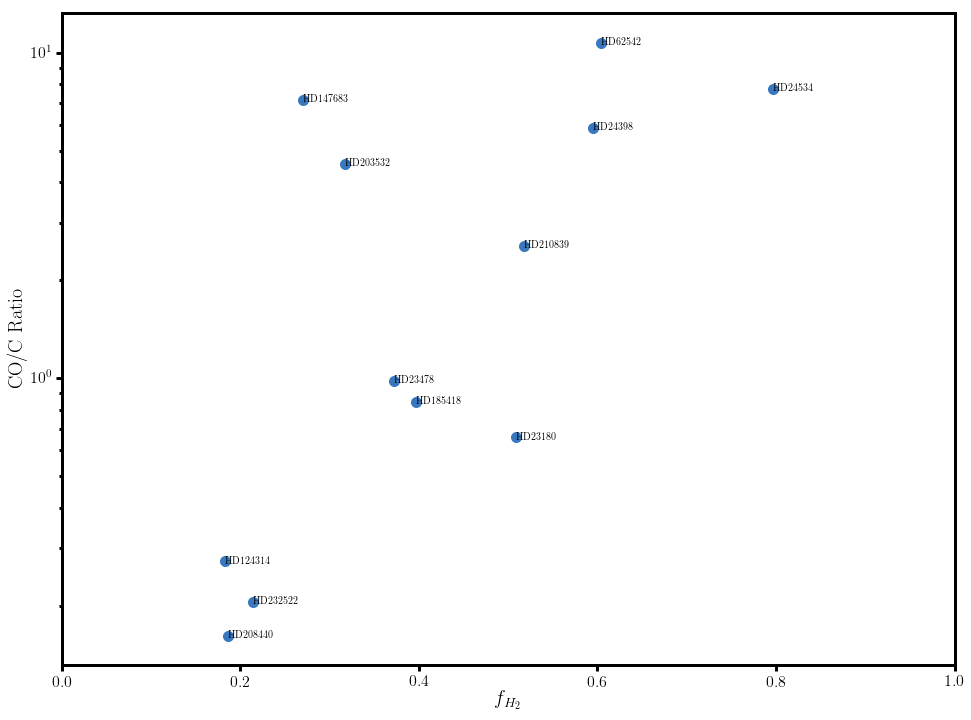

In [7]:
fig=plt.figure(figsize=(16,12),facecolor='w')
subplt=plt.subplot(111)


for sl,data in all_data.groupby('Sightline'):
    c_sum=np.log10((10**data[['C','C*','C**']]).sum().sum())
    co_sum=np.log10((10**data['CO']).sum())
    co_c_ratio=10**(co_sum-c_sum)
    published_h=published_hs[published_hs['Name']==sl]
    
    h2=published_h['N(H2)'].dropna()
    if len(h2)>0:
        h2=np.log10(h2.iloc[-1])
        co_h2_ratio=10**(co_sum-h2)
    h=published_h['N(H)'].dropna()
    if len(h)>0:
        h=np.log10(h.iloc[-1])
    if all([type(i)==np.float64 for i in (h,h2)]):
        fh2=2*(10**h2)/(10**h)
        subplt.plot(fh2,co_c_ratio,marker='o',color=blue,markersize=10)
        subplt.text(fh2,co_c_ratio,sl,va='center')    
    
for idx,row in burgh_data.iterrows():
    if row['CO'].startswith('<'):
        co=float(row['CO'][1:])
        yerr=0.1*10**(co-row['CI'])
        xerr=0.1*10**(co-row['H2'])
        ms=0
        ul=True
        xul=True
    else:
        co=float(row['CO'])
        yerr=0
        xerr=0
        ms=10
        ul=False
        xul=True
    #subplt.errorbar(10**(co-row['H2']),10**(co-row['CI']),yerr=yerr,xerr=xerr,uplims=ul,xuplims=xul,marker='o',color='k',markersize=ms)

#s1 = C
#s2 = CO
for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y)),(s3,(s3x,s3y)),(s4,(s4x,s4y))] in theor_results:
    h2=s3y
    c=s1y-1.8
    co=s2y
    co_c_ratio=10**(co-c)
    co_h2_ratio=10**(co-h2)
    #subplt.plot(co_h2_ratio,co_c_ratio,'r--',zorder=-1,linewidth=1)
    #subplt.text(co_h2_ratio[-1],co_c_ratio[-1],str(n),fontsize=25,ha='left',va='center')

subplt.set_xlim(0,1)
#subplt.set_xscale('log')
subplt.set_yscale('log')
#subplt.axvline(1e-6,linestyle='--',color='k',linewidth=1)
#subplt.axhline(1,linestyle='--',color='k',linewidth=1)
subplt.set_xlabel('$f_{H_2}$')
subplt.set_ylabel('CO/C Ratio')

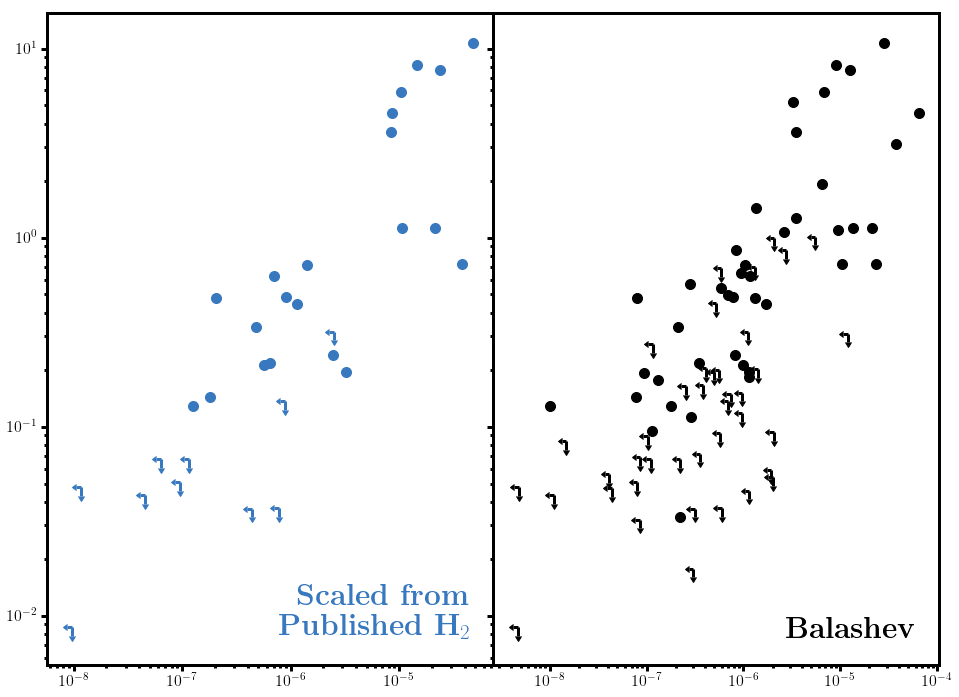

In [8]:
fig=plt.figure(1,figsize=(16,12),facecolor='w')
subplt1=plt.subplot(121)
subplt2=plt.subplot(122)
plt.subplots_adjust(wspace=0)
subplt1.set_xscale('log')
subplt1.set_yscale('log')
subplt2.set_xscale('log')
subplt2.set_yscale('log')
subplt2.set_yticklabels([])

subplt1.text(0.95,0.04,'\\textbf{Scaled from}\n \\textbf{Published H$_2$}',transform=subplt1.transAxes,color=blue,fontsize=30,ha='right')
for sl,mydata in all_data.groupby('Sightline',sort=False):
    cl_sum=np.log10(np.sum(10**mydata['Cl']))
    published_h2s=published_hs[published_hs['Name']==sl]['N(H2)'].dropna()
    if len(published_h2s)>0:
        h2_sum=np.log10(published_h2s.iloc[-1])
        for idx,row in mydata[mydata['C']>0].iterrows():
            c_sum=np.log10(np.sum([10**n for n in row[['C','C*','C**']]]))
            x_cl=round(10**(row['Cl']-cl_sum),4)
            h2=np.log10(x_cl*10**(h2_sum))
            if np.isfinite(h2):
                if row['CO']==0:
                    co=row['CO_err']
                    xerr=0.1*10**(co-h2)
                    yerr=0.1*10**(co-c_sum)
                    uplims=True
                    xuplims=True
                    size=0
                else:
                    co=row['CO']
                    yerr=0
                    xerr=0
                    uplims=False
                    xuplims=False
                    size=10
                co_c_ratio=co-c_sum
                co_h2_ratio=co-h2
                subplt1.errorbar(10**co_h2_ratio,10**co_c_ratio,yerr=yerr,xerr=xerr,uplims=uplims,color=blue,xuplims=xuplims,marker='o',markersize=size)

                
subplt2.text(0.95,0.04,'\\textbf{Balashev}',transform=subplt2.transAxes,color='k',fontsize=30,ha='right')
# Plot H2 and CO for all components with detected Cl I (which traces H2)
for idx,row in all_data[(all_data['Cl']>0) & (all_data['C']>0)].iterrows():
    c_sum=np.log10(np.sum([10**n for n in row[['C','C*','C**']]]))
    if row['CO']==0:
        co=row['CO_err']
        xerr=0.1*10**(co-row['H_2'])
        yerr=0.1*10**(co-c_sum)
        uplims=True
        xuplims=True
        size=0
    else:
        co=row['CO']
        yerr=0
        xerr=0
        uplims=False
        xuplims=False
        size=10
        
    co_c_ratio=co-c_sum
    co_h2_ratio=co-row['H_2']
    subplt2.errorbar(10**co_h2_ratio,10**co_c_ratio,yerr=yerr,xerr=xerr,uplims=uplims,color='k',xuplims=xuplims,marker='o',markersize=size)
    
# Integrated Values
#for sl,data in all_data.groupby('Sightline'):
#    c_sum=np.log10((10**data[['C','C*','C**']]).sum().sum())
#    co_sum=np.log10((10**data['CO']).sum())
#    h2_sum=np.log10((10**data['H_2']).sum())
#    if h2_sum>0:
#        subplt.plot(10**(co_sum-h2_sum),10**(co_sum-c_sum),marker='o',color='k',markersize=10)
        
#s1 = C
#s2 = CO
for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y)),(s3,(s3x,s3y)),(s4,(s4x,s4y))] in theor_results:
    h2=s4y
    c=s1y
    co=s2y
    co_c_ratio=10**(co-c)
    co_h2_ratio=10**(co-h2)
    #subplt.plot(co_h2_ratio,co_c_ratio,'r--',zorder=-1,linewidth=1)
    #subplt.text(co_h2_ratio[-1],co_c_ratio[-1],str(n),fontsize=25,ha='left',va='center')

Text(0.5,0,'Log$_{10}$ N(CO)/N(H$_2$)')

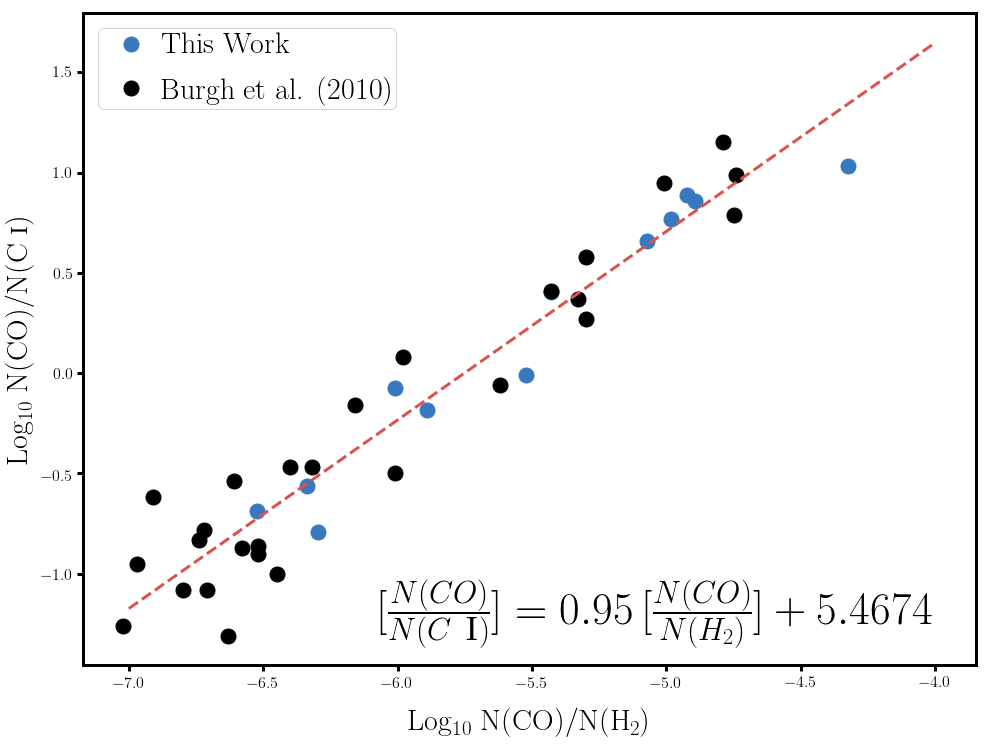

In [39]:
# Derive H2 from CO/C

fig=plt.figure(figsize=(16,12),facecolor='w')
subplt=plt.subplot(111)

# Plot H2 and CO for all components with detected Cl I (which traces H2)
mine_x=[]
mine_y=[]
for sl,data in all_data.groupby('Sightline'):
    c_sum=np.log10((10**data[['C','C*','C**']]).sum().sum())
    co_sum=np.log10((10**data['CO']).sum())
    published_h2s=published_hs[published_hs['Name']==sl]['N(H2)'].dropna()
    if len(published_h2s)>0:
        h2_sum=np.log10(published_h2s.iloc[-1])
        co_c_ratio=co_sum-c_sum
        co_h2_ratio=co_sum-h2_sum
        mine_x.append(co_h2_ratio)
        mine_y.append(co_c_ratio)
        #subplt.plot(co_h2_ratio,co_c_ratio,marker='o',color=blue,markersize=15,zorder=1,label='This Work')
        
burgh_x=[]
burgh_y=[]
for idx,row in burgh_data.iterrows():
    if row['CO'].startswith('<')==False:
        co_c_ratio=float(row['CO'])-row['CI']
        co_h2_ratio=float(row['CO'])-row['H2']
        burgh_x.append(co_h2_ratio)
        burgh_y.append(co_c_ratio)
        #subplt.plot(co_h2_ratio,co_c_ratio,marker='o',color='k',markersize=15,zorder=0,label='Burgh et al. (2010)')

subplt.plot(mine_x,mine_y,linestyle='None',marker='o',color=blue,markersize=15,label='This Work')
subplt.plot(burgh_x,burgh_y,linestyle='None',marker='o',color='k',markersize=15,label='Burgh et al. (2010)')


fitx=np.array(mine_x+burgh_x)
fity=np.array(mine_y+burgh_y)
fit=linregress(x=fitx,y=fity)
tx=np.linspace(-7,-4,10)
subplt.plot(tx,fit.slope*tx+fit.intercept,linestyle='--',color=red)

#s1 = C
#s2 = CO
for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y)),(s3,(s3x,s3y)),(s4,(s4x,s4y))] in theor_results:
    h2=s4y
    c=s1y-1.8
    co=s2y
    co_c_ratio=co-c
    co_h2_ratio=co-h2
    #subplt.plot(co_h2_ratio,co_c_ratio,'r--',zorder=-1,linewidth=1)
    #subplt.text(co_h2_ratio[-1],co_c_ratio[-1],str(n),fontsize=25,ha='left',va='center')
    
    
subplt.text(-4.0,-1.4,'$[\\frac{N(CO)}{N(C~\\textsc{i})}] = 0.95\,[\\frac{N(CO)}{N(H_2)}] + 5.4674$',fontsize=45,ha='right',va='bottom')
plt.legend(loc=2,fontsize=30,borderpad=0.1,handletextpad=0)
#subplt.set_xscale('log')
#subplt.set_yscale('log')
subplt.set_ylabel('Log$_{10}$ N(CO)/N(C \\textsc{i})',fontsize=30)
subplt.set_xlabel('Log$_{10}$ N(CO)/N(H$_2$)',fontsize=30,labelpad=20)
plt.savefig

Text(0,0.5,'N(H$_2$) (Sightline)')

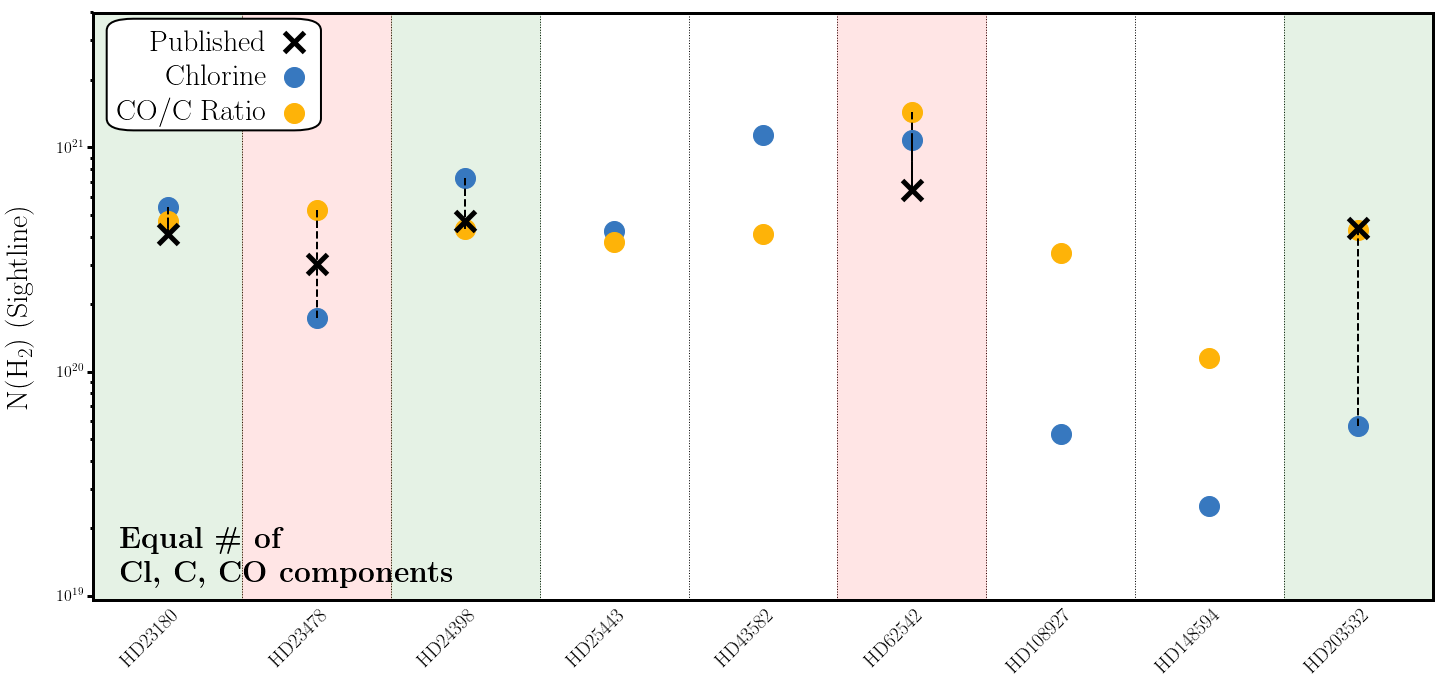

In [10]:
fig=plt.figure(figsize=(24,12),facecolor='w')
subplt=plt.subplot(111)
plt.subplots_adjust(bottom=0.2)

i=0
for sl,data in all_data.groupby('Sightline',sort=False):
    num_cl_comps=len(data[data['Cl']>0])
    num_co_comps=len(data[data['CO']>0])
    if num_cl_comps==num_co_comps:
        co=np.log10((10**data['CO']).sum())
        c=np.log10((10**data[['C','C*','C**']]).sum().sum())
        cl_h2=np.log10((10**data['H_2']).sum())
        
        subplt.plot(i,10**cl_h2,marker='o',color=blue,markersize=20)
        
        co_h2_ratio=((co-c)-5.4674)/0.949756
        h2=co-co_h2_ratio
        subplt.plot(i,10**h2,marker='o',color=amber,markersize=20)
        #print('{:>10}'.format(sl),
        #      '{:>6}'.format(round(published_h2,2)),
        #      '{:>6}'.format(round(h2,2)),
        #      '{:>6}'.format(round(row['H_2'],2)))
        
        published_h2s=published_hs[published_hs['Name']==sl]['N(H2)']
        if len(published_h2s)>0:
            pub_h2=np.log10(published_h2s.iloc[-1])
            subplt.plot(i,10**pub_h2,'kx',markersize=20,mew=5)
            subplt.plot([i,i],[10**cl_h2,10**pub_h2],'k--',linewidth=2)
            subplt.plot([i,i],[10**h2,10**pub_h2],'k--',linewidth=2)
            if abs(10**(cl_h2)-10**(pub_h2))>=abs(10**(h2)-10**(pub_h2)):
                subplt.fill_between([i-0.5,i+0.5],[10**(18.98)]*2,[10**(21.6)]*2,color='g',alpha=0.1)
            else:
                subplt.fill_between([i-0.5,i+0.5],[10**(18.98)]*2,[10**(21.6)]*2,color='r',alpha=0.1)
        
        subplt.text(i+0.1,10**18.96,sl,rotation=45,va='top',ha='right',fontsize=20)
        subplt.axvline(i-0.5,linestyle=':',linewidth=1,zorder=-1)
        i=i+1
            
#tx=np.linspace(17,22,10)
#subplt.plot(tx,tx,'r--')

bb=patches.FancyBboxPatch(xy=(0.03,0.82),width=.12,height=.15,boxstyle="round,pad=0.02", fc="w", ec="k", lw=2,alpha=1.0,transform=subplt.transAxes,zorder=1)
subplt.add_patch(bb)
subplt.text(0.13,0.97,"Published\nChlorine\nCO/C Ratio",transform=subplt.transAxes,ha='right',va='top',fontsize=30)
subplt.plot(0.15,0.95,marker='x',color='k',markersize=20,mew=5,transform=subplt.transAxes)
subplt.plot(0.15,0.89,marker='o',color=blue,markersize=20,transform=subplt.transAxes)
subplt.plot(0.15,0.83,marker='o',color=amber ,markersize=20,transform=subplt.transAxes)

subplt.text(0.02,0.02,'\\textbf{Equal \# of }\n \\textbf{Cl, C, CO components}',transform=subplt.transAxes,ha='left',fontsize=30,va='bottom')

subplt.set_xticklabels([])
subplt.set_xticks([])

subplt.set_xlim(-0.5,8.5)

subplt.set_yscale('log')
subplt.set_ylim(10**18.98,10**21.6)
subplt.set_ylabel('N(H$_2$) (Sightline)',fontsize=30,labelpad=20)


#plt.savefig('/Users/codydirks/Desktop/plots/H2_method_comparison_equal_comps.pdf')

Text(18.65,18.5,'0.2 dex')

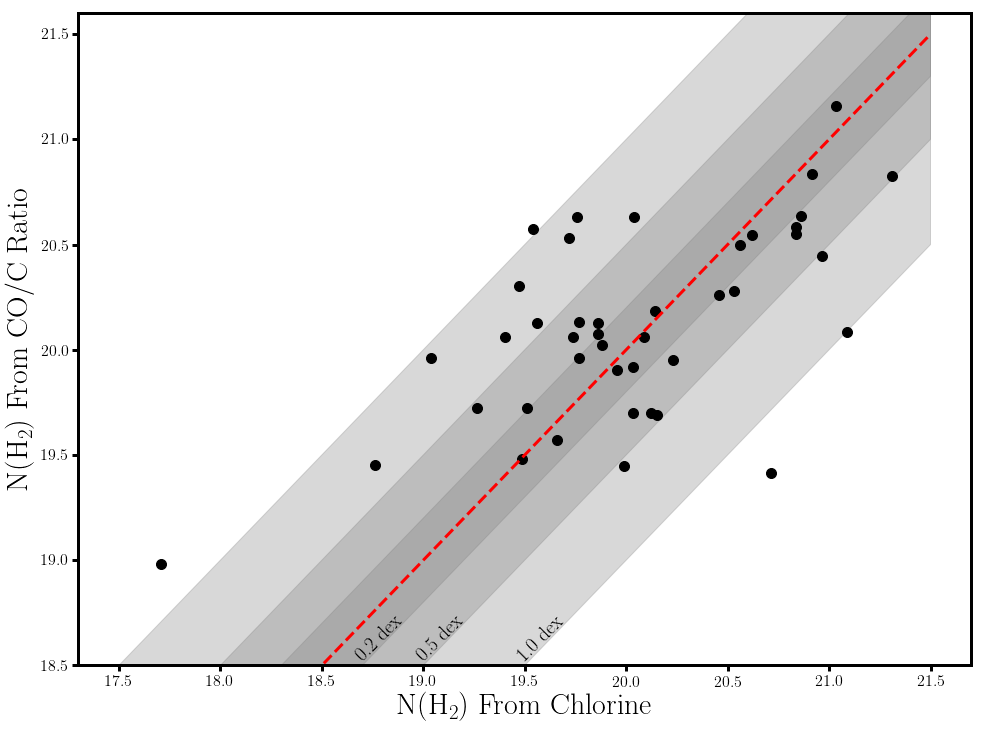

In [11]:
fig=plt.figure(figsize=(16,12),facecolor='w')
subplt=plt.subplot(111)
chi_param='C'
for sl,data in all_data.groupby('Sightline'):
    chi_tot=np.log10((10**data[chi_param]).sum())
    for idx,row in data[(data['CO']>0) & (data['H_2']>0)].iterrows():
        co=row['CO']
        c=np.log10((10**row[['C','C*','C**']]).sum())
        cl_h2=row['H_2']
        co_h2_ratio=((co-c)-5.4674)/0.949756
        h2=co-co_h2_ratio
        x=10**(row[chi_param]-chi_tot)
        subplt.plot(cl_h2,h2,'ko',markersize=10)
    
tx=np.linspace(17.5,21.5,10)
subplt.plot(tx,tx,'r--')
subplt.fill_between(tx,tx-0.2,tx+0.2,color='gray',alpha=0.3)
subplt.fill_between(tx,tx-0.5,tx+0.5,color='gray',alpha=0.3)
subplt.fill_between(tx,tx-1,tx+1,color='gray',alpha=0.3)

subplt.set_ylim(18.5,21.6)
subplt.set_xlabel('N(H$_2$) From Chlorine'  ,fontsize=30)
subplt.set_ylabel('N(H$_2$) From CO/C Ratio',fontsize=30)
subplt.text(19.45,18.5,'1.0 dex',ha='left',va='bottom',fontsize=20,rotation=45)
subplt.text(18.95,18.5,'0.5 dex',ha='left',va='bottom',fontsize=20,rotation=45)
subplt.text(18.65,18.5,'0.2 dex',ha='left',va='bottom',fontsize=20,rotation=45)

#plt.savefig('/Users/codydirks/Desktop/plots/cl_vs_co_c_components_comparison.pdf')

Text(0.02,0.02,'\\textbf{All Sightlines}')

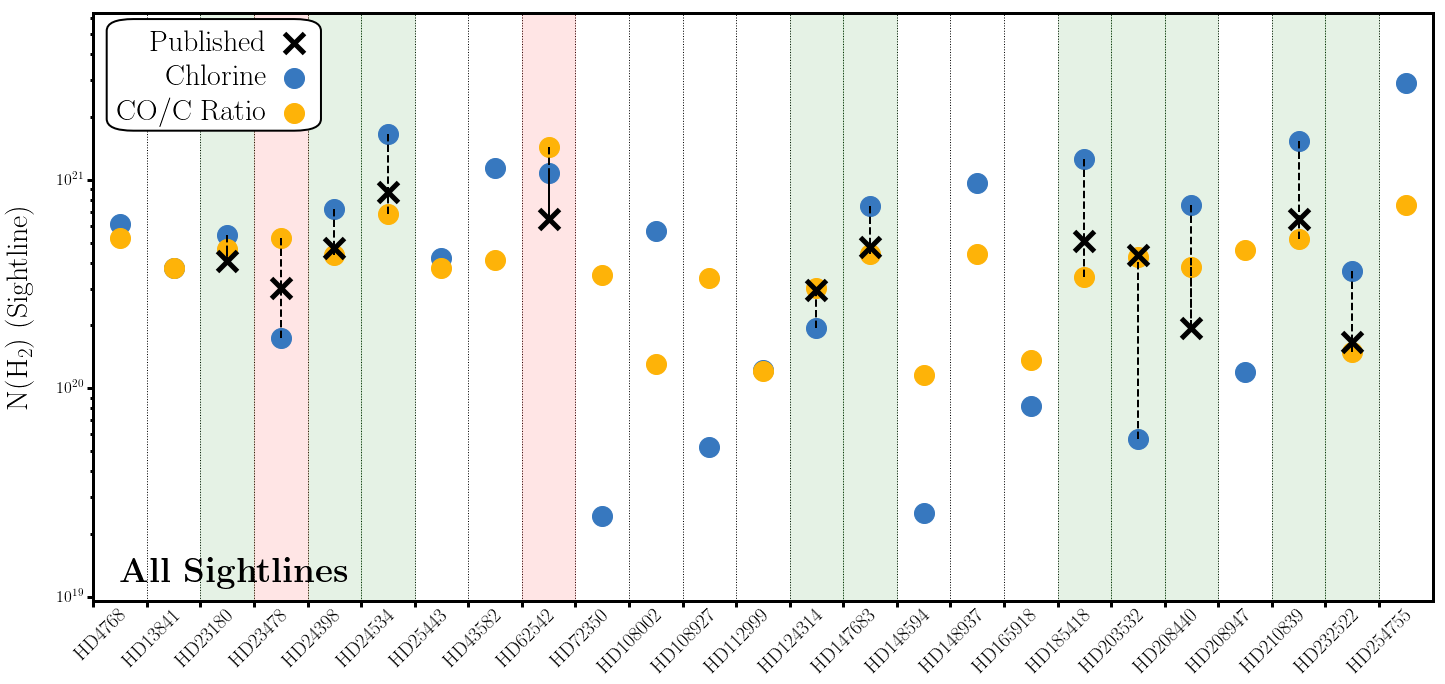

In [12]:
fig=plt.figure(figsize=(24,12),facecolor='w')
subplt=plt.subplot(111)
plt.subplots_adjust(bottom=0.2)

i=0
for sl,data in all_data.groupby('Sightline',sort=False):
    co=np.log10((10**data['CO']).sum())
    c=np.log10((10**data[['C','C*','C**']]).sum().sum())
    cl_h2=np.log10((10**data['H_2']).sum())

    subplt.plot(i,10**cl_h2,marker='o',color=blue,markersize=20)

    co_h2_ratio=((co-c)-5.4674)/0.949756
    h2=co-co_h2_ratio
    subplt.plot(i,10**h2,marker='o',color=amber,markersize=20)

    published_h2s=published_hs[published_hs['Name']==sl]['N(H2)']
    if len(published_h2s)>0:
        pub_h2=np.log10(published_h2s.iloc[-1])
        subplt.plot(i,10**pub_h2,'kx',markersize=20,mew=5)
        subplt.plot([i,i],[10**cl_h2,10**pub_h2],'k--',linewidth=2)

        subplt.plot([i,i],[10**h2,10**pub_h2],'k--',linewidth=2)
        if abs(10**(cl_h2)-10**(pub_h2))>=abs(10**(h2)-10**(pub_h2)):
            subplt.fill_between([i-0.5,i+0.5],[10**(18.98)]*2,[10**(21.8)]*2,color='g',alpha=0.1)
        else:
            subplt.fill_between([i-0.5,i+0.5],[10**(18.98)]*2,[10**(21.8)]*2,color='r',alpha=0.1)

    subplt.text(i+0.2,10**18.96,sl,rotation=45,va='top',ha='right',fontsize=20)
    subplt.axvline(i-0.5,linestyle=':',linewidth=1,zorder=-1)
    i=i+1

subplt.set_xticklabels([])
subplt.set_xticks([j-0.5 for j in range(i)])

subplt.set_xlim(-0.5,i-0.5)
subplt.set_yscale('log')
subplt.set_ylim(10**18.98,10**21.8)
subplt.set_ylabel('N(H$_2$) (Sightline)',fontsize=30,labelpad=20)


bb=patches.FancyBboxPatch(xy=(0.03,0.82),width=.12,height=.15,boxstyle="round,pad=0.02", fc="w", ec="k", lw=2,alpha=1.0,transform=subplt.transAxes,zorder=1)
subplt.add_patch(bb)
subplt.text(0.13,0.97,"Published\nChlorine\nCO/C Ratio",transform=subplt.transAxes,ha='right',va='top',fontsize=30)
subplt.plot(0.15,0.95,marker='x',color='k',markersize=20,mew=5,transform=subplt.transAxes)
subplt.plot(0.15,0.89,marker='o',color=blue,markersize=20,transform=subplt.transAxes)
subplt.plot(0.15,0.83,marker='o',color=amber ,markersize=20,transform=subplt.transAxes)

subplt.text(0.02,0.02,'\\textbf{All Sightlines}',transform=subplt.transAxes,ha='left',fontsize=35,va='bottom')

#plt.savefig('/Users/codydirks/Desktop/plots/H2_method_comparison_all_sightlines.pdf')

Text(0.98,0.05,'\\textbf{Individual Components}')

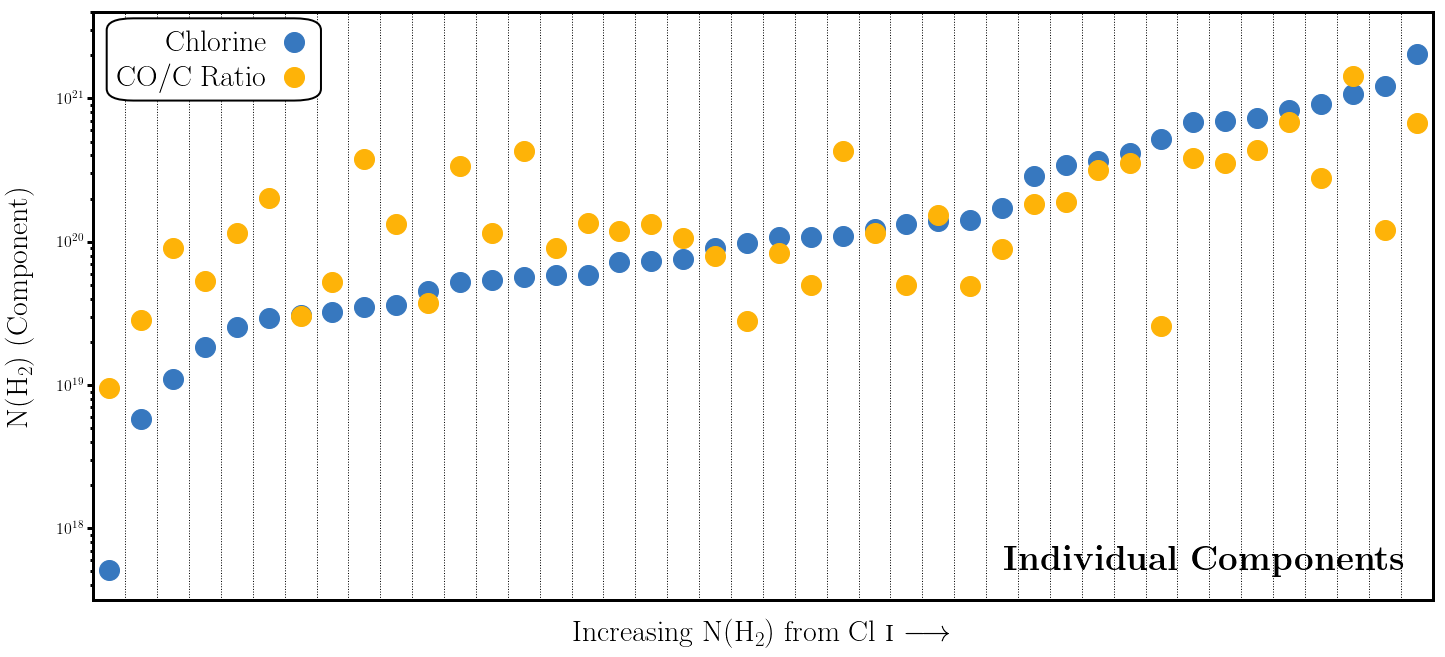

In [13]:
fig=plt.figure(figsize=(24,12),facecolor='w')
subplt=plt.subplot(111)
plt.subplots_adjust(bottom=0.2)

i=0
for idx,row in all_data[(all_data['CO']>0) & (all_data['H_2']>0)].sort_values('H_2').iterrows():
    sl=row['Sightline']
    co=row['CO']
    c=np.log10((10**row[['C','C*','C**']]).sum())
    cl_h2=row['H_2']
    subplt.plot(i,10**cl_h2,marker='o',color=blue,markersize=20)

    co_h2_ratio=((co-c)-5.4674)/0.949756
    h2=co-co_h2_ratio
    subplt.plot(i,10**h2,marker='o',color=amber,markersize=20)
    #subplt.text(i+0.2,10**17.48,sl,rotation=45,va='top',ha='right',fontsize=20)
    subplt.axvline(i-0.5,linestyle=':',linewidth=1,zorder=-1)
    i=i+1
    
    
bb=patches.FancyBboxPatch(xy=(0.03,0.87),width=.12,height=.10,boxstyle="round,pad=0.02", fc="w", ec="k", lw=2,alpha=1.0,transform=subplt.transAxes,zorder=1)
subplt.add_patch(bb)
subplt.text(0.13,0.97,"Chlorine\nCO/C Ratio",transform=subplt.transAxes,ha='right',va='top',fontsize=30)
subplt.plot(0.15,0.95,marker='o',color=blue,markersize=20,transform=subplt.transAxes)
subplt.plot(0.15,0.89,marker='o',color=amber ,markersize=20,transform=subplt.transAxes)
    
subplt.axhline(1,linestyle='--')
subplt.set_xticklabels([])
subplt.set_xticks([])
#subplt.set_xticks([j-0.5 for j in range(i)])

subplt.set_xlim(-0.5,i-0.5)
subplt.set_yscale('log')
subplt.set_ylim(10**17.5,10**21.6)
subplt.set_ylabel('N(H$_2$) (Component)',fontsize=30,labelpad=20)
subplt.set_xlabel('Increasing N(H$_2$) from Cl~\\textsc{i} $\longrightarrow$',fontsize=30,labelpad=20)

subplt.text(0.98,0.05,'\\textbf{Individual Components}',transform=subplt.transAxes,ha='right',fontsize=35)

#plt.savefig('/Users/codydirks/Desktop/plots/H2_method_comparison_components.pdf')

In [14]:
# If I trust new H2s, investigate Cl H2 relationship with fH2



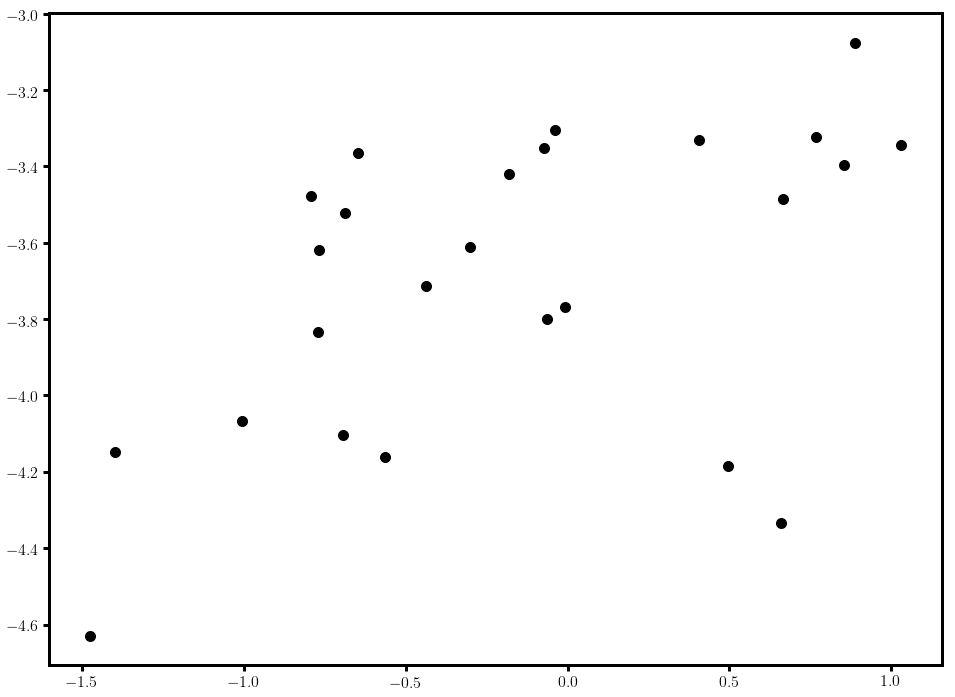

In [15]:
fig=plt.figure(figsize=(16,12),facecolor='w')
subplt=plt.subplot(111)
for sl,data in all_data.groupby('Sightline'):
    c_sum=np.log10((10**data[['C','C*','C**']]).sum().sum())
    co_sum=np.log10((10**data['CO']).sum())
    o_sum=np.log10((10**data['O']).sum())
    cl_sum=np.log10((10**data['Cl']).sum())
    co_h2_ratio=((co_sum-c_sum)-5.4674)/0.949756
    h2_calc=co_sum-co_h2_ratio

    subplt.plot(co_sum-c_sum,cl_sum-o_sum,marker='o',color='k',markersize=10) 

#plt.savefig('/Users/codydirks/Desktop/plots/cl_vs_co_c_components_comparison.pdf')

In [22]:
a=[1,2,3]
b=[4,5,6]
a+b

[1, 2, 3, 4, 5, 6]